# Ada boost
- https://www.analyticsvidhya.com/blog/2021/09/adaboost-algorithm-a-complete-guide-for-beginners/

In [17]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import numpy as np

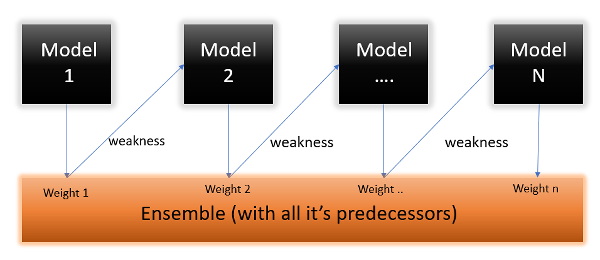

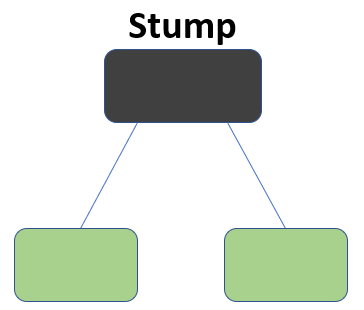

In [18]:
models = []
alphas = []
def my_adaboost(X,y,n_estimators=5):
    n_samples, n_features = X.shape
    weights = np.ones(n_samples) / n_samples

    for _ in range(n_estimators):
        model = DecisionTreeClassifier(max_depth=1)
        model.fit(X, y, sample_weight=weights)
        predictions = model.predict(X)

        error = np.sum(weights * (predictions != y))

        alpha = 0.5 * np.log((1 - error) / (error + 1e-10))
        alphas.append(alpha)

        weights *= np.exp(-alpha * y * predictions)
        weights /= np.sum(weights)

        models.append(model)
        
def adaboost_predict(X):
    n_samples = X.shape[0]
    predictions = np.zeros(n_samples)

    for alpha, model in zip(alphas, models):
        predictions += alpha * model.predict(X)

    return np.sign(predictions)

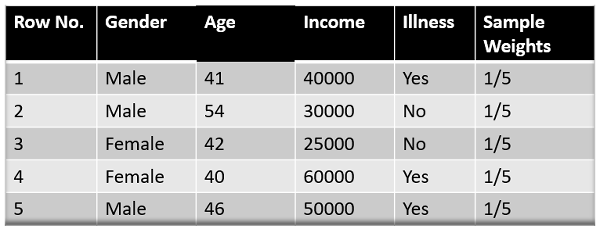

In [19]:
import pandas as pd

# Create a list of lists containing the data
data = {
    "Gender": [1, 1, 0, 0, 1],
    "Age": [41, 54, 42, 40, 46],
    "Income":[40000, 30000, 25000, 60000, 50000],
    "Illness":[1, 0, 0, 1, 1]
}
# Create a pandas DataFrame from the dictionary
df = pd.DataFrame(data)

X=df.drop('Illness',axis=1)
Y=df["Illness"]

In [20]:
my_adaboost(X,Y,n_estimators=5)

# Make predictions on the testing set
y_pred = adaboost_predict(X)

# Calculate the accuracy
accuracy = accuracy_score(Y, y_pred)
print("Accuracy:", accuracy)

print("Y Predicted")
print(y_pred)
print("Y Actual")
print(list(Y))

Accuracy: 1.0
Y Predicted
[1. 0. 0. 1. 1.]
Y Actual
[1, 0, 0, 1, 1]
